#### 2023-04-26

##### 1교시

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer 

In [ ]:
# 서로 다른 알공리즘을 가진 분류기들 중 다수의 분류기가 결정한 예측값을 최종으로 선정하는 방식은?
Voting(보팅)

In [7]:
cancer = load_breast_cancer()
x = cancer.data

y = cancer.target


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train, y_train)

pred = dt_clf.predict(x_test) 

In [8]:
accuracy_score(y_test,pred) 

0.9239766081871345

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

cancer = load_breast_cancer()
x_tr,x_te,y_tr,y_te = train_test_split(
cancer.data, cancer.target, test_size=0.2, random_state=156)
l = LogisticRegression(solver='liblinear')
k = KNeighborsClassifier(n_neighbors=8) 
d = DecisionTreeClassifier()

In [11]:
# 보팅방식으로 정확도(accuracy_score)를 구해 봅시다.

In [4]:
vo_clf = VotingClassifier(estimators=[('LR', l), ('KNN', k),('DT',d)], voting = 'soft')
vo_clf.fit(x_tr, y_tr)
pred = vo_clf.predict(x_te)
accuracy_score(y_te, pred) 

0.9385964912280702

mpg 데이터의 displ,cyl,cty,hwy를 데이터, class를 타겟으로 데이터 분할하고
배깅 중 랜덤 포레스트를 이용하여
그리드서치 및 적합하여
아래 파라미터 중 가장 최적의 파라미터를 찾고
그 때에 정확도를 구하며
최적의 파라미터를 가진 분류기의 피쳐 중요도 순대로 정리 후
수평 막대그래프를 출력하는 코드를 작성하시오.

In [5]:
from pydataset import data
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
mpg = data('mpg')
x_tr,x_te,y_tr,y_te = train_test_split(mpg.iloc[:,[2,4,7,8]],mpg['class'],test_size=0.2)
p = {'max_depth':[8,16],'min_samples_split':[2,8,16], 'min_samples_leaf':[6,12], 'n_estimators':[100,200]}
r = RandomForestClassifier(n_jobs=-1, random_state=1234)
grid = GridSearchCV(r,param_grid=p,cv=2,n_jobs=-1) 

In [6]:
grid.fit(x_tr,y_tr)

GridSearchCV(cv=2,
             estimator=RandomForestClassifier(n_jobs=-1, random_state=1234),
             n_jobs=-1,
             param_grid={'max_depth': [8, 16], 'min_samples_leaf': [6, 12],
                         'min_samples_split': [2, 8, 16],
                         'n_estimators': [100, 200]})

In [7]:
grid.best_params_ 
best = grid.best_estimator_

In [8]:
pred = best.predict(x_te)
accuracy_score(y_te, pred)

0.5531914893617021

In [9]:
temp = pd.Series(best.feature_importances_, index=x_tr.columns).sort_values(ascending=False)
temp

hwy      0.428201
displ    0.302998
cty      0.233077
cyl      0.035724
dtype: float64

<Axes: >

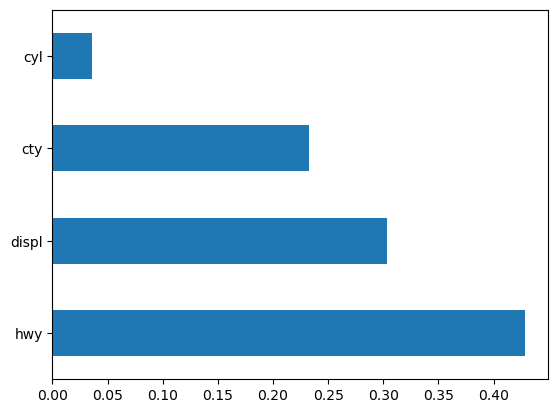

In [10]:
temp.plot(kind='barh')

##### 2교시

In [ ]:
앙상블기법 PDF로 수업진행

In [11]:
import os
os.getcwd()
os.chdir('C:\\Users\\admin')

In [12]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                         if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [13]:
def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('./human_activity/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
    
    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('./human_activity/train/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('./human_activity/test/X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('./human_activity/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('./human_activity/test/y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test

In [14]:
X_train, X_test, y_train, y_test = get_human_dataset()

##### 3교시 221p

In [ ]:
RandomForestClassifier() : Machine Learning(DeepLearning)
parameter = 가중치 = 매개변수
---------------------------------------------------------
하이퍼파라미터 = 파라미터 = 매개변수 = 옵션
하이퍼파라미터 튜닝 

In [ ]:
pd.sum(axis = 1, ... ) : 파라미터, parameter, 인수, 인자, argument

In [15]:
from sklearn.ensemble import GradientBoostingClassifier

In [16]:
X_train, X_test, y_train, y_test = get_human_dataset()

In [17]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                         if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df 

In [55]:
def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('./human_activity/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
    
    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('./human_activity/train/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('./human_activity/test/X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('./human_activity/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('./human_activity/test/y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test

In [18]:
from sklearn.ensemble import GradientBoostingClassifier
import time

X_train, X_test, y_train, y_test = get_human_dataset() 
X_train = X_train[['tGravityAcc-min()-X', 'fBodyAccJerk-bandsEnergy()-1,16', 'angle(Y,gravityMean)', 'fBodyAccMag-energy()','tGravityAcc-arCoeff()-Z,2'] ]
X_test = X_test[['tGravityAcc-min()-X', 'fBodyAccJerk-bandsEnergy()-1,16', 'angle(Y,gravityMean)', 'fBodyAccMag-energy()','tGravityAcc-arCoeff()-Z,2'] ] 

start_time = time.time()
gb_clf = GradientBoostingClassifier(random_state=6)
gb_clf.fit(X_train, y_train)
pred = gb_clf.predict(X_test)
acc = accuracy_score(y_test,pred)
end_time = time.time()

print(acc)
print(f'걸린시간:{end_time - start_time: .1f}')

C:\Users\user\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.835425856803529
걸린시간: 9.4


In [ ]:
sequence : 시퀀스 
parallel : 병렬적

##### 5교시 240p

In [19]:
import xgboost

In [ ]:
xgboost 설치 후 책으로 진행

##### 6교시

In [ ]:
loss function  손실함수
error function 오차함수
objective function 목적함수

In [50]:
from xgboost import XGBClassifier

In [51]:
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [52]:
xgb_clf = XGBClassifier(n_estimators =400, learning_rate = 0.05, max_depth = 3, eval_metric = 'logloss')
xgb_clf.fit(X_train, y_train, verbose = True)
pred = xgb_clf.predict(X_test)
pred_proba = xgb_clf.predict_proba(X_test)[:,1]
accuracy_score(y_test,pred)

0.9473684210526315

In [53]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train)

In [54]:
xgb_clf = XGBClassifier(n_estimators =400, learning_rate = 0.05, max_depth = 3)
evals = [ (X_tr, y_tr),(X_val, y_val)]

xgb_clf.fit(X_tr, y_tr, early_stopping_rounds=50, eval_metric='logloss',
            eval_set = evals, verbose = True)
pred = xgb_clf.predict(X_test)
pred_proba = xgb_clf.predict_proba(X_test)[:,1]
accuracy_score(y_test,pred)

[0]	validation_0-logloss:0.65002	validation_1-logloss:0.65369
[1]	validation_0-logloss:0.61026	validation_1-logloss:0.61754
[2]	validation_0-logloss:0.57452	validation_1-logloss:0.58508
[3]	validation_0-logloss:0.54119	validation_1-logloss:0.55518
[4]	validation_0-logloss:0.51110	validation_1-logloss:0.52806
[5]	validation_0-logloss:0.48280	validation_1-logloss:0.50323
[6]	validation_0-logloss:0.45701	validation_1-logloss:0.48019
[7]	validation_0-logloss:0.43276	validation_1-logloss:0.45885
[8]	validation_0-logloss:0.41025	validation_1-logloss:0.43954
[9]	validation_0-logloss:0.39048	validation_1-logloss:0.42211
[10]	validation_0-logloss:0.37090	validation_1-logloss:0.40524
[11]	validation_0-logloss:0.35260	validation_1-logloss:0.38988
[12]	validation_0-logloss:0.33591	validation_1-logloss:0.37577
[13]	validation_0-logloss:0.31988	validation_1-logloss:0.36231
[14]	validation_0-logloss:0.30527	validation_1-logloss:0.34996
[15]	validation_0-logloss:0.29117	validation_1-logloss:0.33864
[1

C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


0.9473684210526315

##### 7교시 245p~252p (자습)

In [55]:
conda install -c conda-forge lightgbm

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\user\anaconda3

  added / updated specs:
    - lightgbm


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2022.12.7  |       h5b45459_0         143 KB  conda-forge
    certifi-2022.12.7          |     pyhd8ed1ab_0         147 KB  conda-forge
    lightgbm-3.3.5             |  py310hd77b12b_0         851 KB
    ------------------------------------------------------------
                                           Total:         1.1 MB

The following NEW packages will be INSTALLED:

  lightgbm           pkgs/main/win-64::lightgbm-3.3.5-py310hd77b12b_0 

The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates    anaconda::ca-certificates-2023.01.10-~ --> conda-forge::ca-certificates-2022.12.7-h5b45459_0 
  certifi            anaconda/win-64::certifi

In [60]:
# LightGBM의 파이썬 패키지인 lightbm에서 LGBMClassifier 임포트
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset = load_breast_cancer()

cancer_df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
cancer_df['target'] = dataset.target
X_features = cancer_df.iloc[:, :-1]
y_label = cancer_df.iloc[:, -1]

# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=156)

# 위에서 만든 X_train, y_train을 다시 쪼개서 90%는 학습과 10%는 검증용 데이터로 분리
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state=156)

# 앞서 XGBoost와 동일하게 n_estimators는 400 설정.
lgbm_wrapper = LGBMClassifier(n_estimators = 400, learning_rate = 0.05)

# LightGBM도 XGBoost와 동일하게 조기 중단 수행 가능.
evals = [(X_tr, y_tr), (X_val, y_val)]
lgbm_wrapper.fit(X_tr, y_tr, early_stopping_rounds = 50, eval_metric = 'logloss',
                 eval_set = evals, verbose = True)
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:,1]

[1]	training's binary_logloss: 0.625671	valid_1's binary_logloss: 0.628248
[2]	training's binary_logloss: 0.588173	valid_1's binary_logloss: 0.601106
[3]	training's binary_logloss: 0.554518	valid_1's binary_logloss: 0.577587
[4]	training's binary_logloss: 0.523972	valid_1's binary_logloss: 0.556324
[5]	training's binary_logloss: 0.49615	valid_1's binary_logloss: 0.537407
[6]	training's binary_logloss: 0.470108	valid_1's binary_logloss: 0.519401
[7]	training's binary_logloss: 0.446647	valid_1's binary_logloss: 0.502637
[8]	training's binary_logloss: 0.425055	valid_1's binary_logloss: 0.488311
[9]	training's binary_logloss: 0.405125	valid_1's binary_logloss: 0.474664
[10]	training's binary_logloss: 0.386526	valid_1's binary_logloss: 0.461267
[11]	training's binary_logloss: 0.367027	valid_1's binary_logloss: 0.444274
[12]	training's binary_logloss: 0.350713	valid_1's binary_logloss: 0.432755
[13]	training's binary_logloss: 0.334601	valid_1's binary_logloss: 0.421371
[14]	training's binary

C:\Users\user\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\user\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


In [62]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    # 평가 지표 출력
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print(f'정확도: {accuracy:.4f}, 정밀도: {precision:.4f}, 재현율: {recall:.4f}, F1: {f1:.4f}, AUC: {roc_auc:.4f}')


In [63]:
get_clf_eval(y_test, preds, pred_proba)

정확도: 0.9561, 정밀도: 0.9615, 재현율: 0.9740, F1: 0.9677, AUC: 0.9877


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

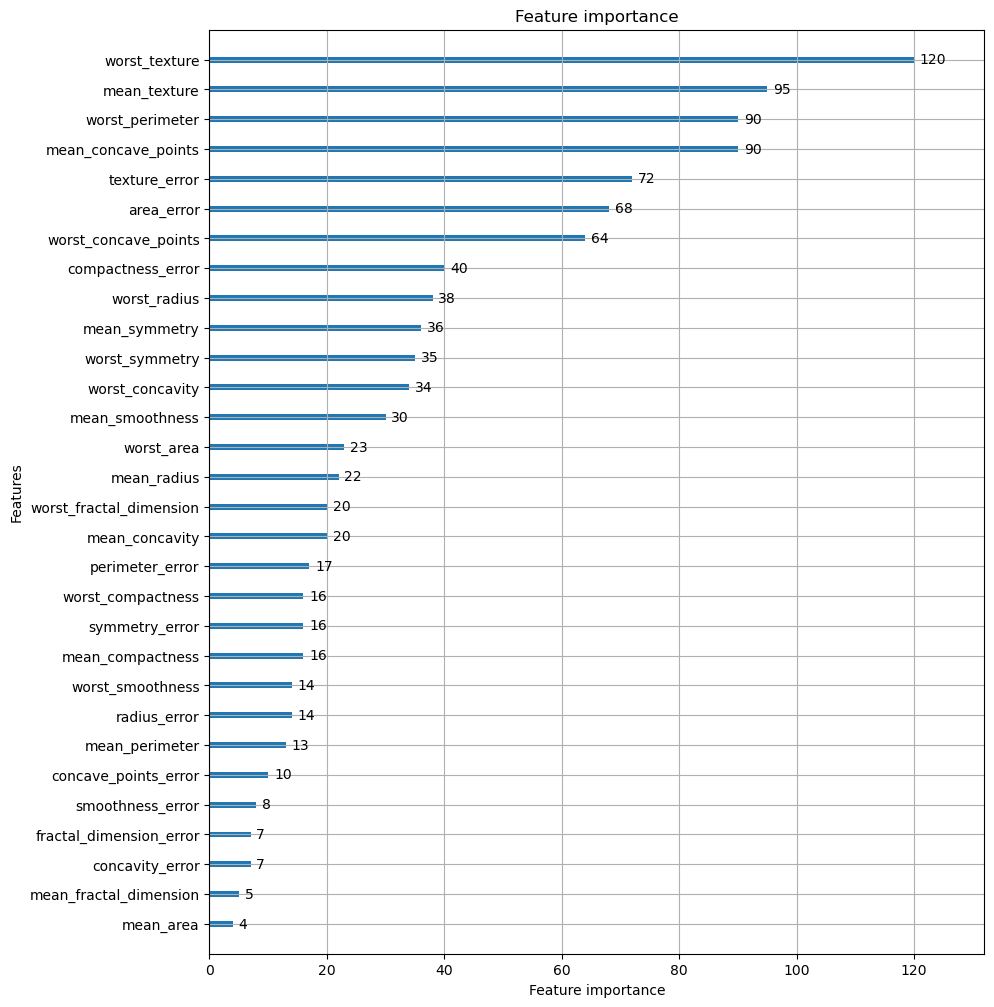

In [65]:
# plot_importance()를 이용하여 feature 중요도 시각화
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(lgbm_wrapper, ax = ax)

##### 8교시 (자습)